In [340]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [341]:
df = pd.read_csv('SOCR-HeightWeight.csv')

In [342]:
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [343]:
df.shape

(25000, 3)

In [344]:
df.drop(columns=['Index'],inplace=True)

In [345]:
df.head()

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


In [346]:
df.rename(columns={'Height(Inches)':'Height','Weight(Pounds)':'Weight'},inplace=True)

In [347]:
df.head()

,Height,Weight
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


In [348]:
df.isnull().sum()

Height    0
Weight    0
dtype: int64

Text(0, 0.5, 'Weight')

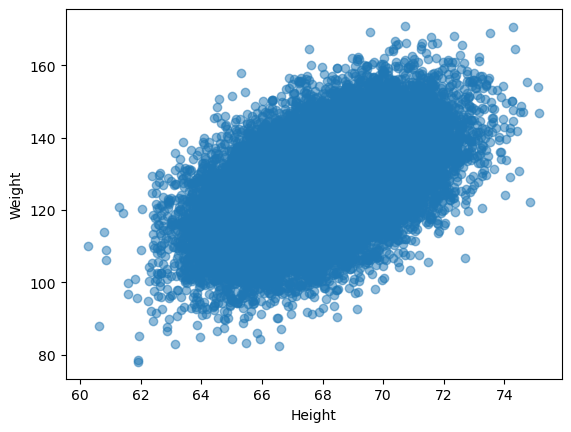

In [349]:
#Scatter plot
plt.scatter(df['Height'],df['Weight'],alpha=0.5)
plt.xlabel('Height')
plt.ylabel("Weight")

In [350]:
#correlation
df.corr()

,Height,Weight
Height,1.000000,0.502859
Weight,0.502859,1.000000


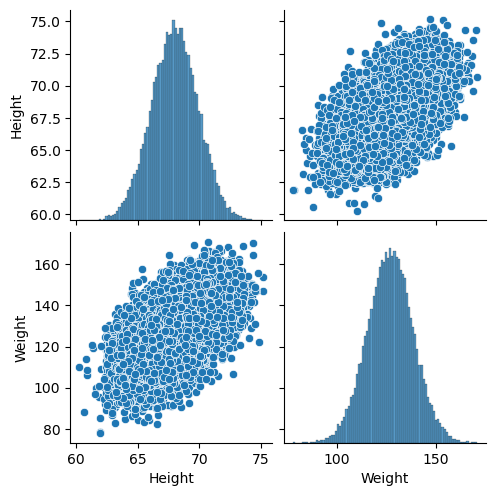

In [351]:
sns.pairplot(df)

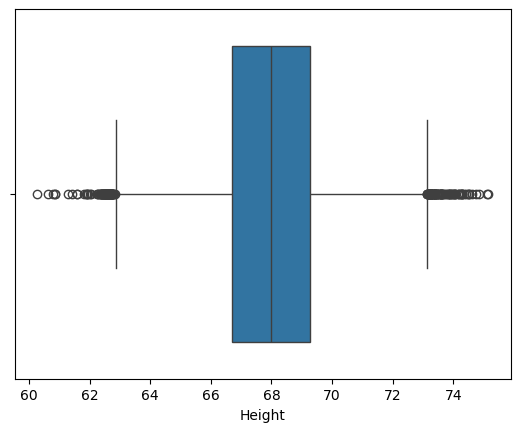

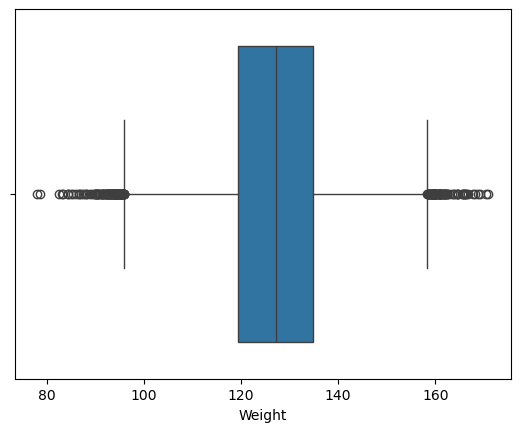

In [352]:
# box plot
for col in df.columns:
    sns.boxplot(
        data=df,
        x=df[col]
    )
    plt.show()

In [353]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3- Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print(f'Lower bound:\n{lower}\n\nUpper bound:\n{upper}')

Lower bound:
Height    62.851557
Weight    95.932412
dtype: float64

Upper bound:
Height     73.125798
Weight    158.269113
dtype: float64


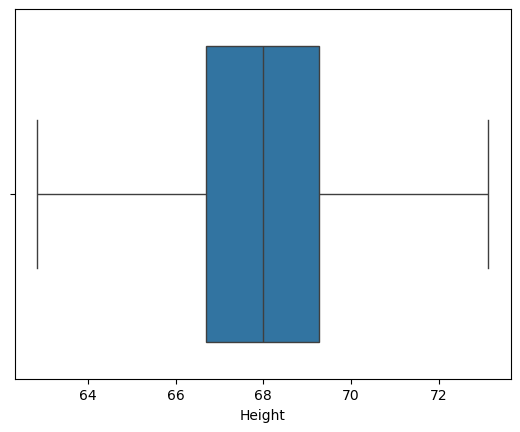

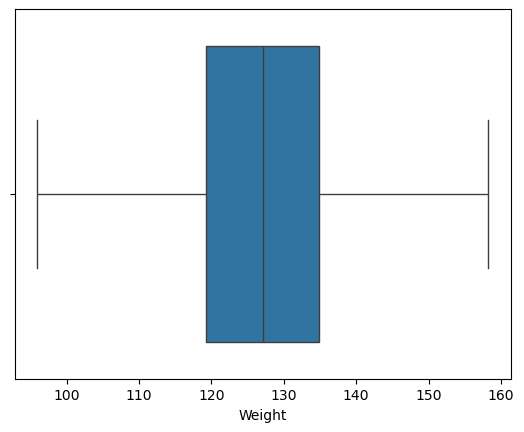

In [354]:
for col in df.columns:
    df[col] = np.where(df[col] > upper[col],upper[col],df[col])
    df[col] = np.where(df[col] < lower[col],lower[col],df[col])
    sns.boxplot(
        data=df,
        x=df[col]
    )
    plt.show()

In [355]:
#independent and dependent features
X=df[['Height']]
y=df['Weight']

In [356]:
X


,Height
0,65.78331
1,71.51521
2,69.39874
3,68.21660
4,67.78781
...,...
24995,69.50215
24996,64.54826
24997,64.69855
24998,67.52918


In [357]:
y

0        112.9925
1        136.4873
2        153.0269
3        142.3354
4        144.2971
           ...   
24995    118.0312
24996    120.1932
24997    118.2655
24998    132.2682
24999    124.8742
Name: Weight, Length: 25000, dtype: float64

In [358]:
#Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [359]:
#standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [360]:
X_train=scaler.fit_transform(X_train)

In [361]:
X_test=scaler.transform(X_test)

In [362]:
print(type(X_train))  # Check if it's a DataFrame or numpy array

# If needed, convert to DataFrame before scaling
if not isinstance(X_train, pd.DataFrame):
    X_train = pd.DataFrame(X_train, columns=['Height'])  # Replace 'Height' with the actual column name(s)
    X_test = pd.DataFrame(X_test, columns=['Height'])


<class 'numpy.ndarray'>


In [363]:
#apply simple  linear regression
from sklearn.linear_model import LinearRegression


In [364]:
regression=LinearRegression()

In [365]:
regression.fit(X_train,y_train)

LinearRegression()

In [366]:
regression.coef_

array([5.78325591])

In [367]:
regression.intercept_

127.08170561762499

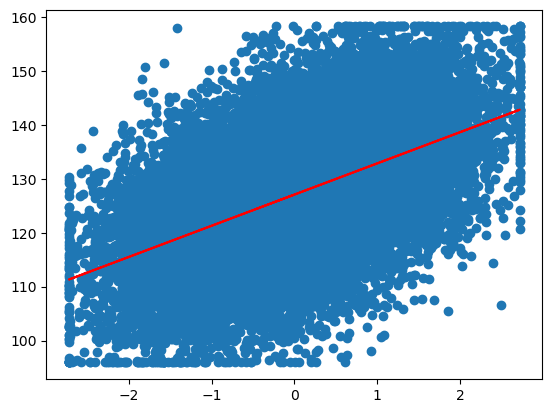

In [368]:
#plot training data best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train),'red')

In [369]:
#prediction for test data
y_pred=regression.predict(X_test)

In [370]:
#performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)

In [371]:
print("MSE :",mse)
print("MAE :",mae)
print("RMSE :",np.sqrt(mse))

MSE : 100.4565194975898
MAE : 7.995000014769417
RMSE : 10.022799982918436


In [372]:
from sklearn.metrics import r2_score
score =r2_score(y_test,y_pred)
print("R2_Score :",score)

R2_Score : 0.2590405529452481


In [373]:
#Adjusted r sqaure

1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.25889230175536115

In [377]:
#prediction for new data
import warnings
warnings.filterwarnings("ignore")

regression.predict(scaler.transform([[56]]))

array([90.311665])